# Imports

In [2]:
import csv
import numpy as np
import pandas as pd
import gudhi
from ripser import ripser
from persim import plot_diagrams
import os
import persim
from sklearn.manifold import MDS
from matplotlib import pyplot as plt

# Input

In [3]:
mtrx_path_dict = [{
    #"pvl":                  "phonogrammatic_homology/texts_new/pvl/hamming_matrix_32_tale_of_bygone_years.csv",
    #"pvl_main":             "phonogrammatic_homology/texts_new/pvl_main/hamming_matrix_{n}2_tale_of_bygone_years_main_transliteration.csv".format(n=i),
    #"dostoevsky_original":  "phonogrammatic_homology/texts_new/dostoevsky_original/hamming_matrix_32_crime_and_punishment_original.csv".format(n=i),
    "dostoevsky_main":      "phonogrammatic_homology/texts_new/dostoevsky_main/hamming_matrix_{n}2_crime_and_punishment_main_transliteration.csv".format(n=i),
    "dostoevsky_gost":      "phonogrammatic_homology/texts_new/dostoevsky_gost/hamming_matrix_{n}2_crime_and_punishment_transliteration_gost.csv".format(n=i),
    "dickens":              "phonogrammatic_homology/texts_new/dickens/hamming_matrix_{n}2_dickens.csv".format(n=i),
    #"java":                 "phonogrammatic_homology/texts_new/java/hamming_matrix_{n}2_letters_of_a_javanese_princess.csv".format(n=i),
    "carroll":              "phonogrammatic_homology/texts_new/carroll/hamming_matrix_{n}2_carroll.csv".format(n=i),
    "pirandello":           "phonogrammatic_homology/texts_new/pirandello/hamming_matrix_{n}2_pirandello.csv".format(n=i),
    "proust":               "phonogrammatic_homology/texts_new/proust/hamming_matrix_{n}2_proust.csv".format(n=i),
    "slauerhoff":           "phonogrammatic_homology/texts_new/slauerhoff/hamming_matrix_{n}2_slauerhoff.csv".format(n=i),
    #
    "tolstoy":              "phonogrammatic_homology/texts_new/tolstoy/hamming_matrix_{n}2_war_and_peace.csv".format(n=i),
    "radishchev":           "phonogrammatic_homology/texts_new/radishchev/hamming_matrix_{n}2_radishchev.csv".format(n=i),
    "bulgakov":             "phonogrammatic_homology/texts_new/bulgakov/hamming_matrix_{n}2_bulgakov.csv".format(n=i),
    "dombrovsky":           "phonogrammatic_homology/texts_new/dombrovsky/hamming_matrix_{n}2_dombrovsky.csv".format(n=i),
    "dostoevsky_26":        "phonogrammatic_homology/texts_new/dostoevsky_26/hamming_matrix_{n}2_crime_and_punishment_transliteration_26.csv".format(n=i),
    "defoe":                "phonogrammatic_homology/texts_new/defoe/hamming_matrix_{n}2_defoe.csv".format(n=i),
    "golding":              "phonogrammatic_homology/texts_new/golding/hamming_matrix_{n}2_golding.csv".format(n=i),
    "rowling":              "phonogrammatic_homology/texts_new/rowling/hamming_matrix_{n}2_rowling.csv".format(n=i),
    "hashek":               "phonogrammatic_homology/texts_new/hashek/hamming_matrix_{n}2_hašek.csv".format(n=i),
    "mann":                 "phonogrammatic_homology/texts_new/mann/hamming_matrix_{n}2_mann.csv".format(n=i),
    #"korean":               "phonogrammatic_homology/texts_new/korean/hamming_matrix_{n}2_korean.csv".format(n=i),
 } for i in range(0,4)]

freq_path_dict = [{
    #"pvl":                  "phonogrammatic_homology/texts_new/pvl/string_{n}2_tale_of_bygone_years.csv".format(n=i),
    #"pvl_main":             "phonogrammatic_homology/texts_new/pvl_main/string_{n}2_tale_of_bygone_years_main_transliteration.csv".format(n=i),
    #"dostoevsky_original":  "phonogrammatic_homology/texts_new/dostoevsky_original/string_{n}2_crime_and_punishment_original.csv".format(n=i),
    "dostoevsky_main":      "phonogrammatic_homology/texts_new/dostoevsky_main/string_{n}2_crime_and_punishment_main_transliteration.csv".format(n=i),
    "dostoevsky_gost":      "phonogrammatic_homology/texts_new/dostoevsky_gost/string_{n}2_crime_and_punishment_transliteration_gost.csv".format(n=i),
    "dickens":              "phonogrammatic_homology/texts_new/dickens/string_{n}2_dickens.csv".format(n=i),
    #"java":                 "phonogrammatic_homology/texts_new/java/string_{n}2_letters_of_a_javanese_princess.csv".format(n=i),
    "carroll":              "phonogrammatic_homology/texts_new/carroll/string_{n}2_carroll.csv".format(n=i),
    "pirandello":           "phonogrammatic_homology/texts_new/pirandello/string_{n}2_pirandello.csv".format(n=i),
    "proust":               "phonogrammatic_homology/texts_new/proust/string_{n}2_proust.csv".format(n=i),
    "slauerhoff":           "phonogrammatic_homology/texts_new/slauerhoff/string_{n}2_slauerhoff.csv".format(n=i),
    #
    "tolstoy":              "phonogrammatic_homology/texts_new/tolstoy/string_{n}2_war_and_peace.csv".format(n=i),
    "radishchev":           "phonogrammatic_homology/texts_new/radishchev/string_{n}2_radishchev.csv".format(n=i),
    "bulgakov":             "phonogrammatic_homology/texts_new/bulgakov/string_{n}2_bulgakov.csv".format(n=i),
    "dombrovsky":           "phonogrammatic_homology/texts_new/dombrovsky/string_{n}2_dombrovsky.csv".format(n=i),
    "dostoevsky_26":        "phonogrammatic_homology/texts_new/dostoevsky_26/string_{n}2_crime_and_punishment_transliteration_26.csv".format(n=i),
    "defoe":                "phonogrammatic_homology/texts_new/defoe/string_{n}2_defoe.csv".format(n=i),
    "golding":              "phonogrammatic_homology/texts_new/golding/string_{n}2_golding.csv".format(n=i),
    "rowling":              "phonogrammatic_homology/texts_new/rowling/string_{n}2_rowling.csv".format(n=i),
    "hashek":               "phonogrammatic_homology/texts_new/hashek/string_{n}2_hašek.csv".format(n=i),
    "mann":                 "phonogrammatic_homology/texts_new/mann/string_{n}2_mann.csv".format(n=i),
    #"korean":               "phonogrammatic_homology/texts_new/korean/string_{n}2_korean.csv".format(n=i),
 } for i in range(0,4)]

In [4]:
def trim(mtrx, freq, threshold=1):
    trim_idx = [i for i, f in enumerate(freq) if f > threshold]
    trim_mtrx = mtrx[trim_idx, :][:, trim_idx]
    trim_freq = freq[trim_idx]
    return trim_mtrx, trim_freq

# Computing persistence diagrams

In [5]:
%%time

dgm_dict = {"":[]}

word_length = 3
freq_threshold = 0
max_dim = 3

for key in mtrx_path_dict[n]:
    print(key)
    mtrx = np.loadtxt(open(mtrx_path_dict[word_length][key]), delimiter=",")
    freq = np.loadtxt(open(freq_path_dict[word_length][key]), delimiter=",")
    trim_mtrx, trim_freq = trim(mtrx, freq, freq_threshold)
    dgm_dict[key] = ripser(trim_mtrx, distance_matrix=True, maxdim=max_dim)['dgms']
    print("---OK---")

dostoevsky_main
---OK---
dostoevsky_gost
---OK---
dickens
---OK---
carroll
---OK---
pirandello
---OK---
proust
---OK---
slauerhoff
---OK---
tolstoy
---OK---
radishchev
---OK---
bulgakov
---OK---
dombrovsky
---OK---
dostoevsky_26
---OK---
defoe
---OK---
golding
---OK---
rowling
---OK---
hashek
---OK---
mann
---OK---
CPU times: user 1min 29s, sys: 7.83 s, total: 1min 37s
Wall time: 1min 38s


# Wasserstein table

In [6]:
dim = 1
table_size = len(mtrx_path_dict[n])
wass_dist = np.zeros((table_size, table_size))

for i, i_key in enumerate(mtrx_path_dict[n]):
    for j, j_key in enumerate(mtrx_path_dict[n]):
        wass_dist[i, j] = persim.wasserstein(dgm_dict[i_key][dim], dgm_dict[j_key][dim])
        
df = pd.DataFrame(data=wass_dist)
idx_dict = {idx:key for idx, key in enumerate(mtrx_path_dict[n])}
df.rename(columns=idx_dict, index=idx_dict)

,dostoevsky_main,dostoevsky_gost,dickens,carroll,pirandello,proust,slauerhoff,tolstoy,radishchev,bulgakov,dombrovsky,dostoevsky_26,defoe,golding,rowling,hashek,mann
dostoevsky_main,0.000000,0.021809,0.177691,0.177272,0.241686,0.202824,0.184227,0.224580,0.243172,0.257903,0.275304,0.140273,0.177202,0.177202,0.177461,0.128639,0.190919
dostoevsky_gost,0.021809,0.000000,0.164958,0.164539,0.251957,0.191779,0.171495,0.232270,0.238093,0.251763,0.272284,0.135668,0.164469,0.164469,0.164728,0.134099,0.178186
dickens,0.177691,0.164958,0.000000,0.000521,0.414305,0.034176,0.006985,0.386679,0.344949,0.360584,0.387751,0.092653,0.000489,0.000489,0.000748,0.278178,0.013506
carroll,0.177272,0.164539,0.000521,0.000000,0.413887,0.034311,0.007060,0.386261,0.344531,0.360165,0.387333,0.092235,0.000070,0.000070,0.000329,0.277759,0.013786
pirandello,0.241686,0.251957,0.414305,0.413887,0.000000,0.424976,0.420147,0.168999,0.280820,0.267518,0.259660,0.327214,0.413817,0.413817,0.414076,0.152506,0.426556
proust,0.202824,0.191779,0.034176,0.034311,0.424976,0.000000,0.036455,0.407190,0.360114,0.387938,0.416208,0.111742,0.034241,0.034241,0.034487,0.306333,0.033532
slauerhoff,0.184227,0.171495,0.006985,0.007060,0.420147,0.036455,0.000000,0.392696,0.351225,0.366722,0.394288,0.098480,0.007025,0.007025,0.006773,0.284715,0.011115
tolstoy,0.224580,0.232270,0.386679,0.386261,0.168999,0.407190,0.392696,0.000000,0.171623,0.149025,0.160958,0.325250,0.386190,0.386190,0.386450,0.154588,0.398751
radishchev,0.243172,0.238093,0.344949,0.344531,0.280820,0.360114,0.351225,0.171623,0.000000,0.125593,0.151255,0.303720,0.344461,0.344461,0.344720,0.230129,0.357053
bulgakov,0.257903,0.251763,0.360584,0.360165,0.267518,0.387938,0.366722,0.149025,0.125593,0.000000,0.099914,0.362011,0.360095,0.360095,0.360354,0.210991,0.372987


# 2d embedding

In [7]:
mds = MDS(dissimilarity='precomputed', random_state=0)
wass_transform = mds.fit_transform(wass_dist)

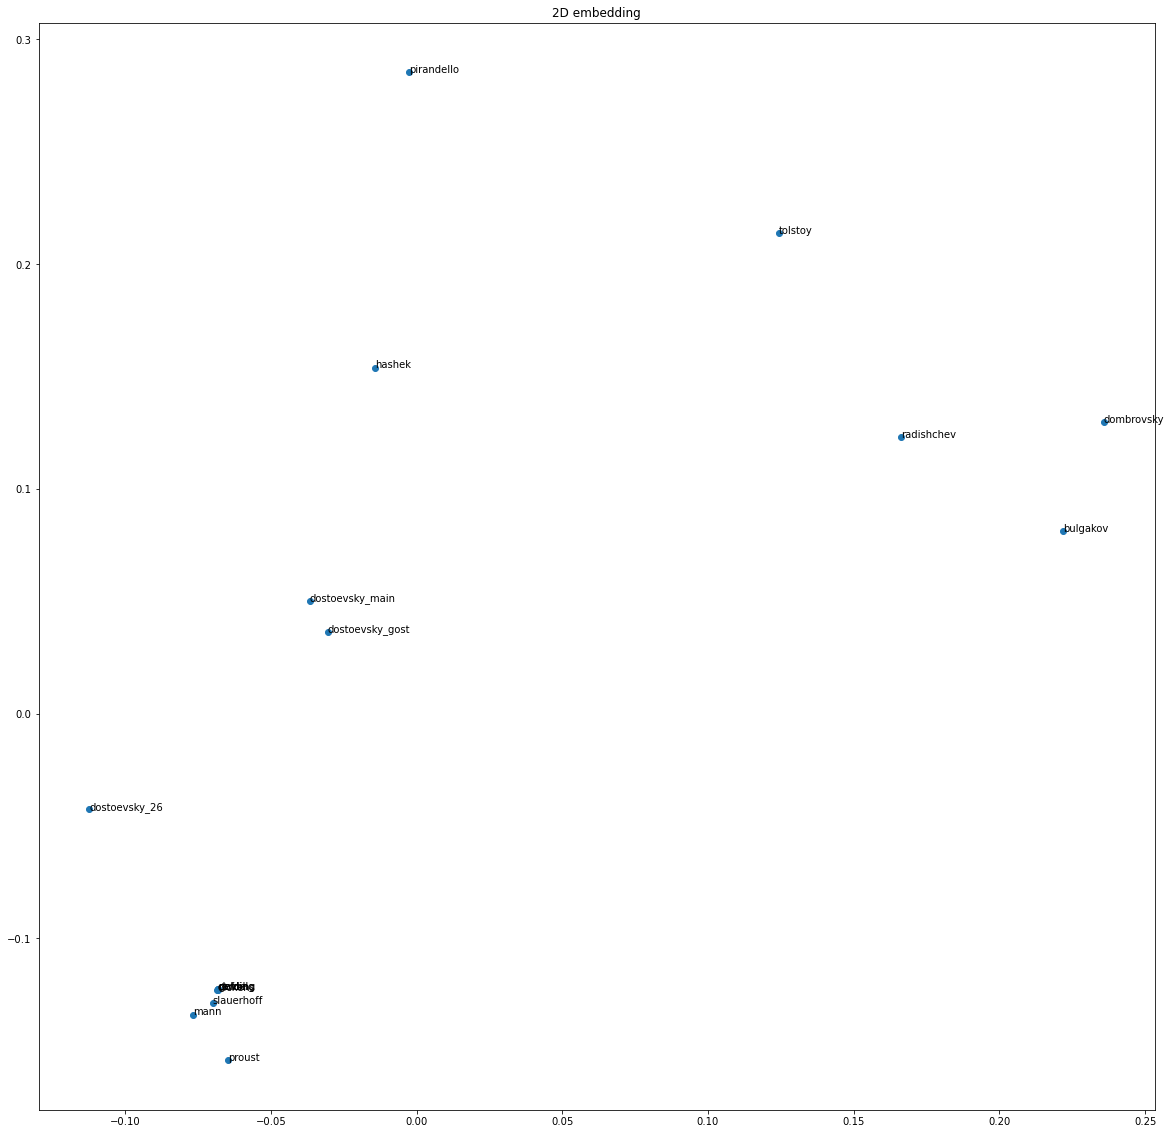

In [8]:
fig = plt.figure(1, (20,20))
ax = fig.add_subplot(111)
plt.scatter(wass_transform[:,0], wass_transform[:,1]) #, s=size, c=colors)

for idx, pt in enumerate(wass_transform):
    plt.text(pt[0], pt[1], idx_dict[idx])

plt.title('2D embedding')
plt.savefig('2d_embedding.png')
plt.show()